In [1]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("datasets/nba.csv")
data.shape


(458, 9)

In [3]:
data.dtypes

Name         object
Team         object
Number      float64
Position     object
Age         float64
Height       object
Weight      float64
College      object
Salary      float64
dtype: object

In [4]:
data.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [5]:
data.isnull().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

In [6]:
data.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [7]:
data.Position.unique()

array(['PG', 'SF', 'SG', 'PF', 'C', nan], dtype=object)

In [9]:
mode = data["College"].mode()

In [17]:
data['College'].fillna(mode[0], inplace=True)

In [18]:
mean = data["Salary"].mean()

In [20]:
data['Salary'].fillna(mean, inplace=True)

In [21]:
data.dropna(inplace=True)

In [22]:
data.isnull().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

In [23]:
data['Height'].value_counts()

6-9     59
6-10    47
6-7     45
6-8     43
6-6     42
6-11    40
6-3     33
6-5     32
6-4     29
7-0     27
6-1     16
6-2     16
6-0     10
7-1      7
7-3      4
5-11     3
7-2      3
5-9      1
Name: Height, dtype: int64

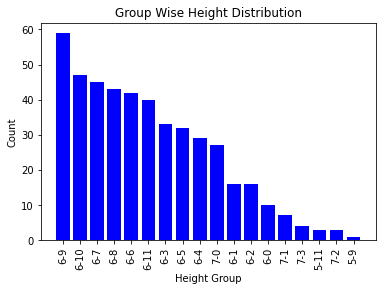

In [29]:
plt.bar(data['Height'].value_counts().index , data['Height'].value_counts(),  data = data, color = "blue")
plt.xlabel("Height Group")
plt.xticks(rotation = 90)
plt.ylabel("Count")
plt.title("Group Wise Height Distribution")
plt.show()

In [30]:
groupedHeights = data.groupby(data['Height'])

In [39]:
groupedHeights.describe()

Number                                                         Age  \
        count       mean        std   min    25%   50%    75%   max count   
Height                                                                      
5-11      3.0  11.666667  12.583057   0.0   5.00  10.0  17.50  25.0   3.0   
5-9       1.0   4.000000        NaN   4.0   4.00   4.0   4.00   4.0   1.0   
6-0      10.0   4.400000   4.060651   0.0   1.00   4.0   7.00  12.0  10.0   
6-1      16.0  15.062500  16.794716   2.0   2.00  10.0  18.50  55.0  16.0   
6-10     47.0  20.340426  19.036894   0.0   7.00  15.0  31.00  90.0  47.0   
6-11     40.0  18.550000  15.790211   0.0   6.75  14.0  28.75  77.0  40.0   
6-2      16.0  12.875000  11.887669   0.0   1.75  12.0  19.50  32.0  16.0   
6-3      33.0  10.818182   9.231246   0.0   3.00   8.0  19.00  34.0  33.0   
6-4      29.0  13.551724  11.918132   2.0   5.00   9.0  20.00  55.0  29.0   
6-5      32.0  11.312500  12.390000   0.0   3.00   5.5  17.75  55.0  32.0   
6-6      42.0  14.690476  15.852196   0.0   5.25  11.0  19.75  99.0  42.0   
6-7      45.0  19.688889  12.491492   0.0  10.00  20.0  26.00  44.0  45.0   
6-8      43.0  21.302326  15.111545   1.0   6.00  22.0  33.50  55.0  43.0   
6-9      59.0  22.389831  19.110402   0.0   7.50  19.0  34.00  90.0  59.0   
7-0      27.0  25.370370  19.777898   0.0  11.50  21.0  40.50  92.0  27.0   
7-1       7.0  16.571429  12.067272   0.0   7.50  20.0  24.00  33.0   7.0   
7-2       3.0  36.333333  17.214335  17.0  29.50  42.0  46.00  50.0   3.0   
7-3       4.0  22.250000  13.913423   6.0  17.25  21.5  26.50  40.0   4.0   

                   ...  Weight        Salary                              \
             mean  ...     75%    max  count          mean           std   
Height             ...                                                     
5-11    25.333333  ...  185.00  195.0    3.0  5.891553e+05  7.926627e+05   
5-9     27.000000  ...  185.00  185.0    1.0  6.912869e+06           NaN   
6-0     29.200000  ...  188.75  205.0   10.0  5.784075e+06  6.337144e+06   
6-1     26.687500  ...  187.00  205.0   16.0  5.217919e+06  4.286013e+06   
6-10    27.468085  ...  251.00  289.0   47.0  5.185375e+06  5.063120e+06   
6-11    27.375000  ...  261.25  307.0   40.0  6.544397e+06  6.906416e+06   
6-2     27.187500  ...  191.25  200.0   16.0  3.523777e+06  3.631376e+06   
6-3     28.393939  ...  200.00  208.0   33.0  5.821784e+06  5.668225e+06   
6-4     26.172414  ...  213.00  220.0   29.0  4.646163e+06  5.275308e+06   
6-5     25.437500  ...  210.00  230.0   32.0  4.391786e+06  4.114296e+06   
6-6     26.190476  ...  220.00  245.0   42.0  3.586813e+06  4.518975e+06   
6-7     27.000000  ...  226.00  260.0   45.0  3.504402e+06  4.337857e+06   
6-8     26.767442  ...  240.00  260.0   43.0  5.950412e+06  6.133934e+06   
6-9     27.220339  ...  249.00  260.0   59.0  4.157787e+06  4.517154e+06   
7-0     26.407407  ...  262.50  280.0   27.0  5.287712e+06  4.675298e+06   
7-1     27.142857  ...  257.50  275.0    7.0  7.400988e+06  6.587462e+06   
7-2     28.666667  ...  259.00  270.0    3.0  6.835639e+06  7.825718e+06   
7-3     24.250000  ...  267.50  290.0    4.0  2.307930e+06  1.484918e+06   

                                                                   
              min        25%        50%           75%         max  
Height                                                             
5-11      55722.0   133733.0   211744.0  8.558720e+05   1500000.0  
5-9     6912869.0  6912869.0  6912869.0  6.912869e+06   6912869.0  
6-0      947276.0  2437500.0  3934473.5  4.846419e+06  21468695.0  
6-1      700902.0  1646160.0  3402626.5  8.633373e+06  13500000.0  
6-10     222888.0  1054584.5  3815000.0  7.025766e+06  19689000.0  
6-11     245177.0  1362370.0  3107656.0  1.143804e+07  22359364.0  
6-2      525093.0   947276.0  1553220.0  4.882013e+06  13437500.0  
6-3      189455.0  1662360.0  4053446.0  8.000000e+06  20093064.0  
6-4      134215.0  1015421.0  2525160.0  5.1

In [47]:
data.Age.value_counts()

24.0    47
25.0    45
27.0    41
23.0    41
26.0    36
28.0    31
30.0    31
29.0    28
22.0    26
31.0    22
20.0    19
21.0    19
33.0    14
32.0    13
34.0    10
36.0    10
35.0     9
37.0     4
38.0     4
40.0     3
39.0     2
19.0     2
Name: Age, dtype: int64

In [49]:
bins = [19, 25, 31, 36, 40]
labels = ['19-24', '25-30', '31-35', '36-40']
data['AgeGroup'] = pd.cut(data['Age'], bins = bins, labels = labels, right=False)
data['AgeGroup'].value_counts()

25-30    212
19-24    154
31-35     68
36-40     20
Name: AgeGroup, dtype: int64

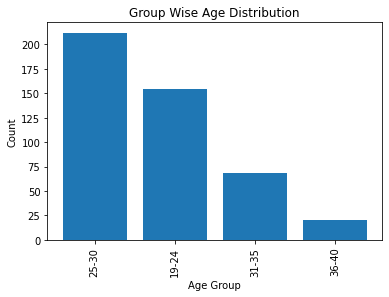

In [52]:
plt.bar(data['AgeGroup'].value_counts().index , data['AgeGroup'].value_counts(),  data = data)
plt.xlabel("Age Group")
plt.xticks(rotation = 90)
plt.ylabel("Count")
plt.title("Group Wise Age Distribution")
plt.show()

In [53]:
data.groupby('AgeGroup')['Salary'].mean()

AgeGroup
19-24    2.761705e+06
25-30    5.870999e+06
31-35    6.635271e+06
36-40    3.897656e+06
Name: Salary, dtype: float64

In [54]:
data.groupby('AgeGroup')['Salary'].median()

AgeGroup
19-24    1.721380e+06
25-30    4.025000e+06
31-35    4.671342e+06
36-40    2.834470e+06
Name: Salary, dtype: float64

In [55]:
listOfSalaries = list(data.groupby('AgeGroup')['Salary'])

In [56]:
listOfSalaries

[('19-24',
  3       1148640.0
  6       1170960.0
  8       1824360.0
  9       3431040.0
  10      2569260.0
            ...    
  446    12000000.0
  447     1175880.0
  449     1348440.0
  452     2239800.0
  454      900000.0
  Name: Salary, Length: 154, dtype: float64),
 ('25-30',
  0      7.730337e+06
  1      6.796117e+06
  2      4.842684e+06
  4      5.000000e+06
  5      1.200000e+07
             ...     
  450    2.050000e+06
  451    9.813480e+05
  453    2.433333e+06
  455    2.900000e+06
  456    9.472760e+05
  Name: Salary, Length: 212, dtype: float64),
 ('31-35',
  19      6300000.0
  31      1635476.0
  33     22875000.0
  34      7402812.0
  43       947276.0
            ...    
  375    13000000.0
  394     4345000.0
  413     3750000.0
  415     3135000.0
  434     5016000.0
  Name: Salary, Length: 68, dtype: float64),
 ('36-40',
  46     4.842684e+06
  72     2.900000e+06
  93     5.675000e+06
  101    3.376000e+06
  102    9.477260e+05
  109    2.500000e+07
  119

### Part 2: IRIS database

In [57]:
df2 = pd.read_csv("datasets/Iris.csv")
df2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [58]:
df2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
df2.shape

(150, 6)

In [61]:
df2["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

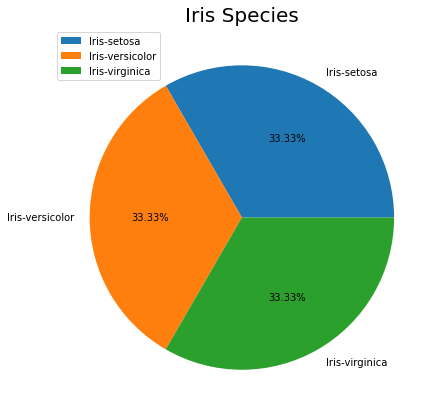

In [62]:
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
size = df2['Species'].value_counts()

plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, labels = labels, shadow = False, autopct = '%.2f%%')
plt.title('Iris Species', fontsize = 20)
plt.legend()
plt.show()

### Mean values for each species

In [63]:
print(df2.groupby(["Species"]).agg(lambda x:x.mean())[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]])

                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa              5.006         3.418          1.464         0.244
Iris-versicolor          5.936         2.770          4.260         1.326
Iris-virginica           6.588         2.974          5.552         2.026


### Median values for each species

In [64]:
print(df2.groupby(["Species"]).agg(lambda x:x.median())[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]])

                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa                5.0           3.4           1.50           0.2
Iris-versicolor            5.9           2.8           4.35           1.3
Iris-virginica             6.5           3.0           5.55           2.0


### SD values for each species

In [65]:
print(df2.groupby(["Species"]).agg(lambda x:x.std())[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]])

                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa           0.352490      0.381024       0.173511      0.107210
Iris-versicolor       0.516171      0.313798       0.469911      0.197753
Iris-virginica        0.635880      0.322497       0.551895      0.274650


### Mode values for each species

In [66]:
print(df2.groupby(["Species"]).agg(lambda x:x.value_counts().index[0])[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]])

                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Species                                                                  
Iris-setosa                5.1           3.4            1.5           0.2
Iris-versicolor            5.5           3.0            4.5           1.3
Iris-virginica             6.3           3.0            5.1           1.8
